In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [2]:
data = [
  [1, 12],
  [2, 14],
  [5, 20],
  [13, 36],
  [17, 44],
  [19, 48],  
  [30, 70],
  [37, 84],
  [43, 96],
  [50, 110]  
]

In [5]:
x = [row[0] for row in data]
print(x)

yr = [row[1] for row in data]
print(yr)

[1, 2, 5, 13, 17, 19, 30, 37, 43, 50]
[12, 14, 20, 36, 44, 48, 70, 84, 96, 110]


In [28]:
print('7) Tensorflow에의한 경사 하강법을 이용한 기울기a와 y절편 b 최적화 시작')
session = tf.Session() # session을 새로 생성해야 기존 학습이 초기화됨.
#a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0), name='a')
#b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0), name='b')
#a = tf.Variable(1, name='a') # ERROR
#b = tf.Variable(1, name='b') # ERROR
#a = tf.Variable(1.0, dtype=tf.float32, seed=0), name='a')
#b = tf.Variable(1.0, dtype=tf.float32, seed=0), name='b')
a = tf.Variable(1.0, dtype=tf.float64, name='a')
b = tf.Variable(1.0, dtype=tf.float64, name='b')
y = a * x + b # 예측값
learning_rate = 0.001 # 학습률
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - yr)))     # 평균 제곱근 오차(예측값-실측값)
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

session.run(tf.global_variables_initializer())

# for step in range(401): # 0 ~ 200
#for step in range(20001): # 0 ~ 20000  학습을 더 시킴
for step in range(40001): # 0 ~ 116000  학습을 더 시킴
    session.run(gradient_decent) # 최소의 오차를 찾기위한 경사하강 실행, 학습
    if step % 2000 == 0:
        v_rmse = session.run(rmse) # 평균 제곱근 오차
        v_a = session.run(a)           # 기울기
        v_b = session.run(b)           # y 절편
        # print(v_a)
        fmt = "Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f"
        print(fmt % (step, v_rmse, v_a, v_b))
        
# RMSE가 감소되는 확인 할것 
print('08) 최적의 산출 공식: y = %.1fx + %.d' % (v_a, v_b))  # y = 8.1x + 80

7) Tensorflow에의한 경사 하강법을 이용한 기울기a와 y절편 b 최적화 시작
Epoch: 0, RMSE = 34.1752, 기울기 a = 1.0270, y 절편 b = 1.0009
Epoch: 2000, RMSE = 4.7202, 기울기 a = 2.2258, y 절편 b = 2.2334
Epoch: 4000, RMSE = 3.9821, 기울기 a = 2.1905, y 절편 b = 3.4479
Epoch: 6000, RMSE = 3.2440, 기울기 a = 2.1552, y 절편 b = 4.6624
Epoch: 8000, RMSE = 2.5058, 기울기 a = 2.1199, y 절편 b = 5.8769
Epoch: 10000, RMSE = 1.7677, 기울기 a = 2.0846, y 절편 b = 7.0914
Epoch: 12000, RMSE = 1.0296, 기울기 a = 2.0493, y 절편 b = 8.3059
Epoch: 14000, RMSE = 0.3734, 기울기 a = 2.0225, y 절편 b = 9.5146
Epoch: 16000, RMSE = 0.3737, 기울기 a = 2.0155, y 절편 b = 9.9331
Epoch: 18000, RMSE = 0.3737, 기울기 a = 2.0139, y 절편 b = 9.9911
Epoch: 20000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 9.9991
Epoch: 22000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0002
Epoch: 24000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
Epoch: 26000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
Epoch: 28000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
Epoch: 30000, RMSE = 0.3737, 기울기 a = 2.0

In [30]:
# 최적의 산출 공식: y = 2.0044x + 10.2715
predict = []
for i in range(len(x)):
    y = v_a * x[i] + v_b # 2.0044 * 1 + 10.2715 첫번째 데이터의 경우
    predict.append(y) 
    # print('데이터: %d, 실제값: %d, 예상값: %s'  % (x[i], yr[i], predict[i]))
    print('데이터: %d, 실제값: %d, 예상값: %d'  % (x[i], yr[i], predict[i]))

데이터: 1, 실제값: 12, 예상값: 12
데이터: 2, 실제값: 14, 예상값: 14
데이터: 5, 실제값: 20, 예상값: 20
데이터: 13, 실제값: 36, 예상값: 36
데이터: 17, 실제값: 44, 예상값: 44
데이터: 19, 실제값: 48, 예상값: 48
데이터: 30, 실제값: 70, 예상값: 70
데이터: 37, 실제값: 84, 예상값: 84
데이터: 43, 실제값: 96, 예상값: 96
데이터: 50, 실제값: 110, 예상값: 110


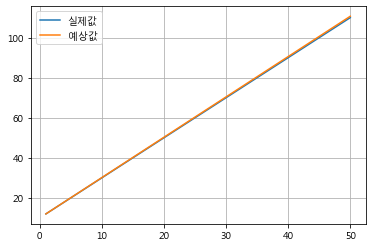

In [33]:
plt.plot(x, yr, label='실제값')
plt.plot(x, predict, label='예상값')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# 테스트, 검증
test_data=[37, 43, 50]
test_data_y=[84, 96, 110]
for i in range(len(test_data)):
    y = v_a * test_data[i] + v_b  # y = ax + b, y = 2.3x + 79 가정
    print('데이터: %d 실제: %d 예측 %d' % (test_data[i], test_data_y[i], y))
    print('데이터: %d 실제: %d 예측 %.5f' % (test_data[i], test_data_y[i], y))
    print('데이터: %d 실제: %d 예측 %s' % (test_data[i], test_data_y[i], y))

데이터: 37 실제: 84 예측 84
데이터: 37 실제: 84 예측 84.50592
데이터: 37 실제: 84 예측 84.50592469675942
데이터: 43 실제: 96 예측 96
데이터: 43 실제: 96 예측 96.58790
데이터: 43 실제: 96 예측 96.58790211946237
데이터: 50 실제: 110 예측 110
데이터: 50 실제: 110 예측 110.68354
데이터: 50 실제: 110 예측 110.68354244594914


In [39]:
# 숨겨진 공식

print((23 + 10 -5) * 2)

56


In [42]:
# 쵲벅의 산출 공식 : y = 2.0137 x + 10.0004
x = input('숫자를 입력하세요. ') # 학습하지 않은 숫자를 입력
y = 2.0137 * int(x) + 10.0004
print('입력값 %s, 예측값 %.f ' % (x,y))

숫자를 입력하세요. 20
입력값 20, 예측값 50 
